# Machine Learning Operations

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hiring.csv')
df.head()

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
import seaborn as sns

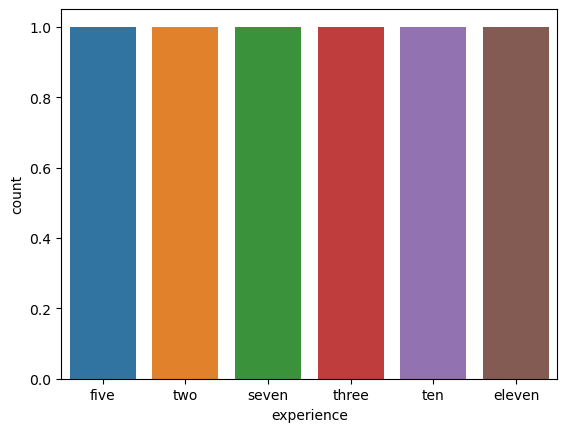

In [4]:
sns.countplot(x=df['experience'], hue=df['experience'], legend=False);

In [6]:
d = {
    'five': 5,
    'two': 2,
    'seven': 7,
    'three': 3,
    'ten': 10,
    'eleven': 11
}

In [7]:
df['experience'] = df['experience'].map(d)

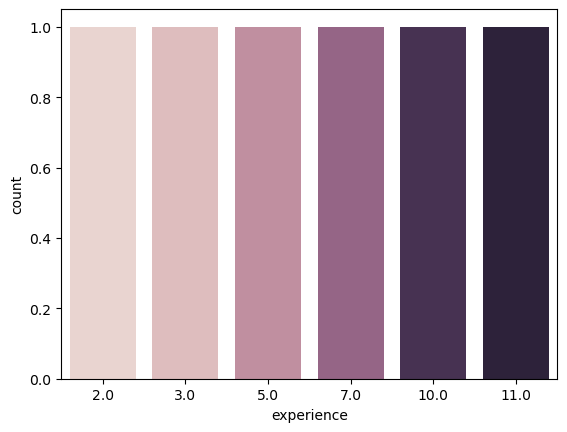

In [8]:
sns.countplot(x=df['experience'], hue=df['experience'], legend=False);

In [9]:
df['experience'] = df['experience'].fillna(0)

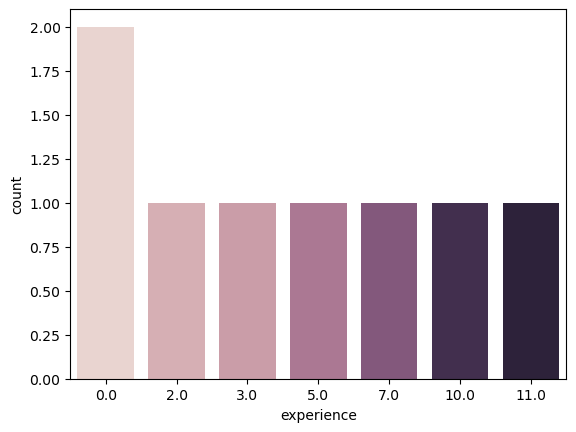

In [10]:
sns.countplot(x=df['experience'], hue=df['experience'], legend=False);

In [11]:
df.isnull().sum()

experience         0
test_score         1
interview_score    0
salary             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      float64
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 388.0 bytes


In [13]:
df['test_score'].fillna(df['test_score'].median(), inplace=True)

In [14]:
x = df.drop('salary', axis=1)
y = df[['salary']]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [17]:
lr = LinearRegression()

In [18]:
import pickle

model = lr.fit(x_train, y_train)
pickle.dump(model, open('salary_lr.pkl', 'wb'))

In [19]:
pred = model.predict(x_test)

In [20]:
rmse = mean_squared_error(pred, y_test) ** 0.5
r2 = r2_score(pred, y_test)

In [21]:
rmse

2213.2833676046635

In [22]:
r2

0.8764895623821122

## Loading the pickled model

In [24]:
new_model = pickle.load(open('salary_lr.pkl', 'rb'))

In [27]:
# Two years of experience, 9 test_score and 9 interview_score

new_model.predict([[2, 9, 9]])

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[59773.22568984]])

With pickle, we can save a fitted model for use later in a different place.